# Import the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Get the datasets

In [3]:
results_adam_lr_001 = pd.read_csv('adam_lr0.001_dead_neuron_overlap_20250217_151701.csv')
results_adam_lr_0001 = pd.read_csv('adam_lr0.0001_dead_neuron_overlap_20250217_154740.csv')
results_adam_lr_1e_05_0 = pd.read_csv('adam_lr1e-05_dead_neuron_overlap_20250217_155059.csv')
results_adam_lr_1e_05_1 = pd.read_csv('adam_lr1e-05_dead_neuron_overlap_20250217_164319.csv')
results_adam_lr_5e_05 = pd.read_csv('adam_lr5e-05_dead_neuron_overlap_20250217_155117.csv')

## Sneak peak into the datasheets 

In [4]:
results_adam_lr_001 

,layer,task,epoch,overlap_ratio,current_dead,historical_dead,intersection
0,layer4,0,1,1.0,34,82,34
1,layer4,0,2,1.0,68,82,68
2,layer4,0,3,1.0,2,82,2
3,layer4,0,4,1.0,4,82,4
4,layer4,0,6,1.0,2,82,2
...,...,...,...,...,...,...,...
96,layer4,4,15,1.0,128,160,128
97,layer4,4,16,1.0,138,160,138
98,layer4,4,17,1.0,131,160,131
99,layer4,4,18,1.0,127,160,127


In [5]:
results_adam_lr_0001

,layer,task,epoch,overlap_ratio,current_dead,historical_dead,intersection
0,layer4,0,1,0.982759,58,66,57
1,layer4,0,2,1.000000,53,67,53
2,layer4,0,3,1.000000,51,67,51
3,layer4,0,4,1.000000,48,67,48
4,layer4,0,5,1.000000,42,67,42
...,...,...,...,...,...,...,...
95,layer4,4,15,1.000000,14,140,14
96,layer4,4,16,1.000000,10,140,10
97,layer4,4,17,1.000000,8,140,8
98,layer4,4,18,1.000000,8,140,8


In [6]:
results_adam_lr_1e_05_0, results_adam_lr_1e_05_1

(     layer  task  epoch  overlap_ratio  current_dead  historical_dead  \
 0   layer3     0      1       1.000000             1                1   
 1   layer4     0      1       0.975610            41               45   
 2   layer3     0      2       1.000000             1                1   
 3   layer4     0      2       0.974359            39               46   
 4   layer4     1      0       0.700000            10               47   
 5   layer3     1      1       1.000000             1                1   
 6   layer4     1      1       1.000000            10               50   
 7   layer3     1      2       1.000000             1                1   
 8   layer4     1      2       1.000000             9               50   
 9   layer3     2      0       1.000000             1                1   
 10  layer4     2      0       0.857143             7               50   
 11  layer4     2      1       1.000000             4               51   
 12  layer4     2      2       0.71428

In [7]:
results_adam_lr_5e_05

,layer,task,epoch,overlap_ratio,current_dead,historical_dead,intersection
0,layer4,0,1,0.925926,54,60,50
1,layer4,0,2,0.980769,52,64,51
2,layer4,1,0,0.641026,39,65,25
3,layer4,1,1,1.000000,34,79,34
4,layer4,1,2,0.969697,33,79,32
5,layer4,2,0,0.782609,23,80,18
6,layer4,2,1,1.000000,17,85,17
7,layer4,2,2,0.954545,22,85,21
8,layer4,3,0,0.826087,23,86,19
9,layer4,3,1,0.941176,17,90,16


## Merge the data frames together

In [8]:
# Create a list to store all dataframes with additional columns
dfs = []

# Add optimizer and lr columns for each dataframe
df1 = results_adam_lr_001.copy()
df1['optimizer'] = 'adam'
df1['learning_rate'] = 0.001

df2 = results_adam_lr_0001.copy()
df2['optimizer'] = 'adam'
df2['learning_rate'] = 0.0001

df3 = results_adam_lr_1e_05_1.copy()
df3['optimizer'] = 'adam'
df3['learning_rate'] = 0.00001

df4 = results_adam_lr_5e_05.copy()
df4['optimizer'] = 'adam'
df4['learning_rate'] = 0.00005

# Combine all dataframes
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Reorder columns to have optimizer and learning_rate at the beginning
cols = ['optimizer', 'learning_rate'] + [col for col in merged_df.columns if col not in ['optimizer', 'learning_rate']]
merged_df = merged_df[cols]

# Display first few rows of the merged dataframe
merged_df

,optimizer,learning_rate,layer,task,epoch,overlap_ratio,current_dead,historical_dead,intersection
0,adam,0.00100,layer4,0,1,1.000000,34,82,34
1,adam,0.00100,layer4,0,2,1.000000,68,82,68
2,adam,0.00100,layer4,0,3,1.000000,2,82,2
3,adam,0.00100,layer4,0,4,1.000000,4,82,4
4,adam,0.00100,layer4,0,6,1.000000,2,82,2
...,...,...,...,...,...,...,...,...,...
224,adam,0.00005,layer4,3,1,0.941176,17,90,16
225,adam,0.00005,layer4,3,2,1.000000,12,91,12
226,adam,0.00005,layer4,4,0,1.000000,2,91,2
227,adam,0.00005,layer4,4,1,1.000000,2,91,2


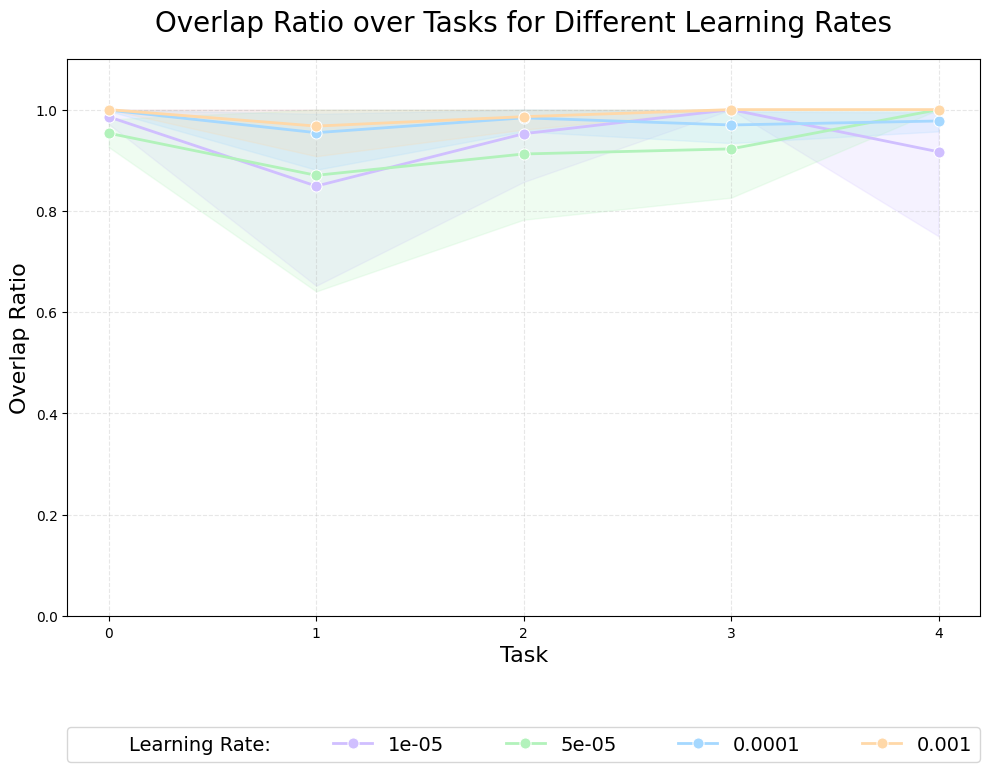

In [49]:
# Define custom colors for each learning rate
colors = ['#d0bfff', '#b2f2bb', '#a5d8ff', '#ffd8a8']

# Create the figure and axis with a larger size
plt.figure(figsize=(10, 9))

# Create the line plot with custom colors
ax = sns.lineplot(data=merged_df[merged_df['layer'] == 'layer4'], 
            x='task',
            y='overlap_ratio',
            hue='learning_rate',
            palette=colors,
            marker='o',
            markersize=8,
            linewidth=2)

# Customize the plot
plt.title('Overlap Ratio over Tasks for Different Learning Rates', 
         fontsize=20, 
         pad=20)
plt.xlabel('Task', fontsize=16)
plt.ylabel('Overlap Ratio', fontsize=16)

# Get the current handles and labels
handles, labels = ax.get_legend_handles_labels()

# Create a new handle for the "Learning Rate:" text
empty_patch = mpatches.Patch(color='none', label='Learning Rate:', visible=False)

# Combine the empty patch with existing handles and labels
handles = [empty_patch] + handles
labels = ['Learning Rate:'] + labels

# Format legend with all elements including the title
plt.legend(handles, labels,
          bbox_to_anchor=(0, -0.2, 1, 0),
          loc='upper center',
          ncol=5,
          mode='expand',
          borderaxespad=0.,
          fontsize=14)

# Customize grid
plt.grid(True, linestyle='--', alpha=0.3)

# Set y-axis limits
plt.ylim(0, 1.1)

# Set x-axis ticks to show all tasks
plt.xticks(range(5))

# Adjust layout to prevent label cutoff
plt.tight_layout(rect=[0, 0.1, 1, 1])

# Show the plot
plt.show()

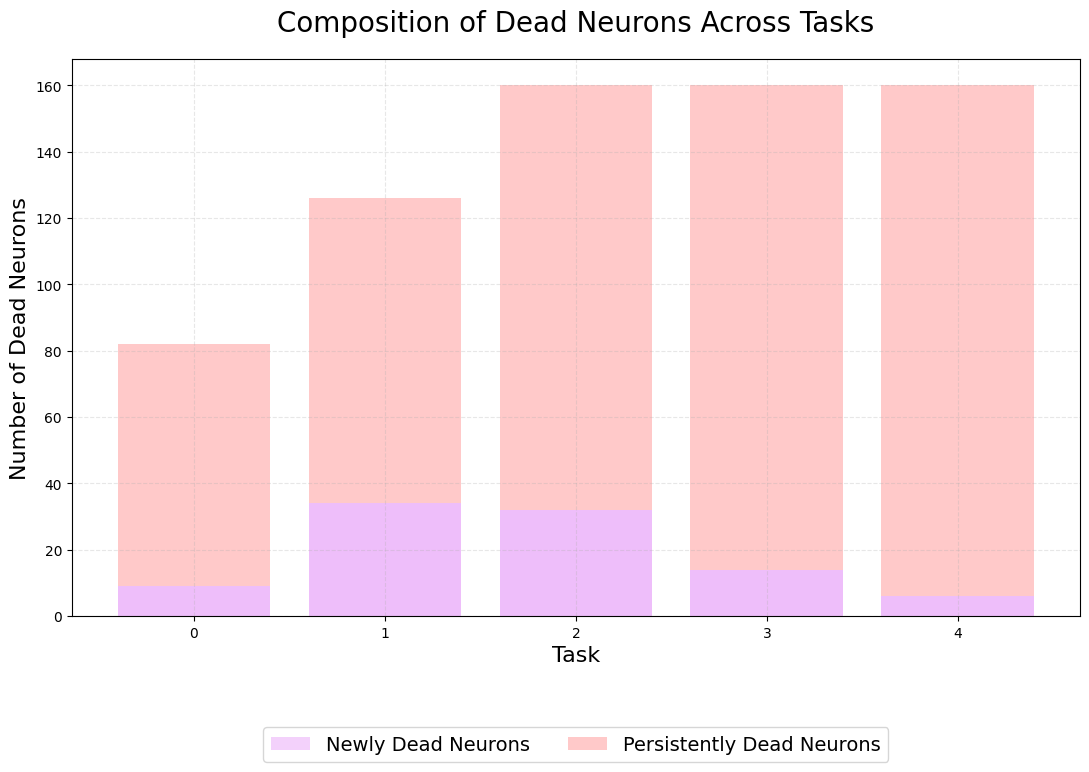

In [ ]:
plt.figure(figsize=(11 , 9))

# Filter data for layer4 and create a view
layer4_data = merged_df[merged_df['layer'] == 'layer4']

# Calculate the components
new_dead = layer4_data['historical_dead'] - layer4_data['intersection']
persistent_dead = layer4_data['intersection']

# Create stacked bar chart with better colors and formatting
plt.bar(layer4_data['task'], 
        new_dead,
        label='Newly Dead Neurons',
        color='#eebefa',
        alpha=0.7)

plt.bar(layer4_data['task'], 
        persistent_dead,
        label='Persistently Dead Neurons',
        color='#ffc9c9',
        bottom=new_dead)

plt.title('Composition of Dead Neurons Across Tasks', fontsize=20, pad=20)
plt.xlabel('Task', fontsize=16)
plt.ylabel('Number of Dead Neurons', fontsize=16)
plt.legend(bbox_to_anchor=(0, -0.2, 1, 0), loc='upper center', borderaxespad=0., fontsize=14, ncol=2)
plt.grid(True, linestyle='--', alpha=0.3)

# Set integer ticks for x-axis
plt.xticks(range(len(layer4_data['task'].unique())))

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

# Permanently Dead Neuron Analysis

In [ ]:
leaky_relu_timeline_df = pd.read_csv("leaky_relu-lr005-layer4_death_timeline.csv")
relu_timeline_df = pd.read_csv("relu-lr005-layer4_death_timeline.csv")
silu_timeline_df = pd.read_csv("silu-lr005-layer4_death_timeline.csv")

In [21]:
# First, add activation function column to each dataframe
leaky_relu_timeline_df['activation'] = 'Leaky ReLU'
relu_timeline_df['activation'] = 'ReLU'
silu_timeline_df['activation'] = 'SiLU'

# Merge all dataframes
combined_df = pd.concat([leaky_relu_timeline_df, relu_timeline_df, silu_timeline_df], ignore_index=True)

# Count dead neurons per task and activation function
dead_counts = combined_df.groupby(['activation', 'death_task'])['neuron_id'].count().reset_index(name='count')

# Create a complete index for all tasks and activations
all_tasks = pd.DataFrame(
    [(act, task) for act in dead_counts['activation'].unique() for task in range(5)],
    columns=['activation', 'death_task']
)

# Merge with actual counts and fill missing values with 0
dead_counts = pd.merge(all_tasks, dead_counts, how='left', on=['activation', 'death_task']).fillna(0)

# Calculate cumulative sum for each activation function
dead_counts_cumsum = dead_counts.pivot(index='death_task', columns='activation', values='count').fillna(0)
dead_counts_cumsum = dead_counts_cumsum.cumsum()
dead_counts_cumsum = dead_counts_cumsum / 160  # Convert to ratio
dead_counts_cumsum = dead_counts_cumsum.reset_index().melt(id_vars=['death_task'], var_name='activation', value_name='ratio')

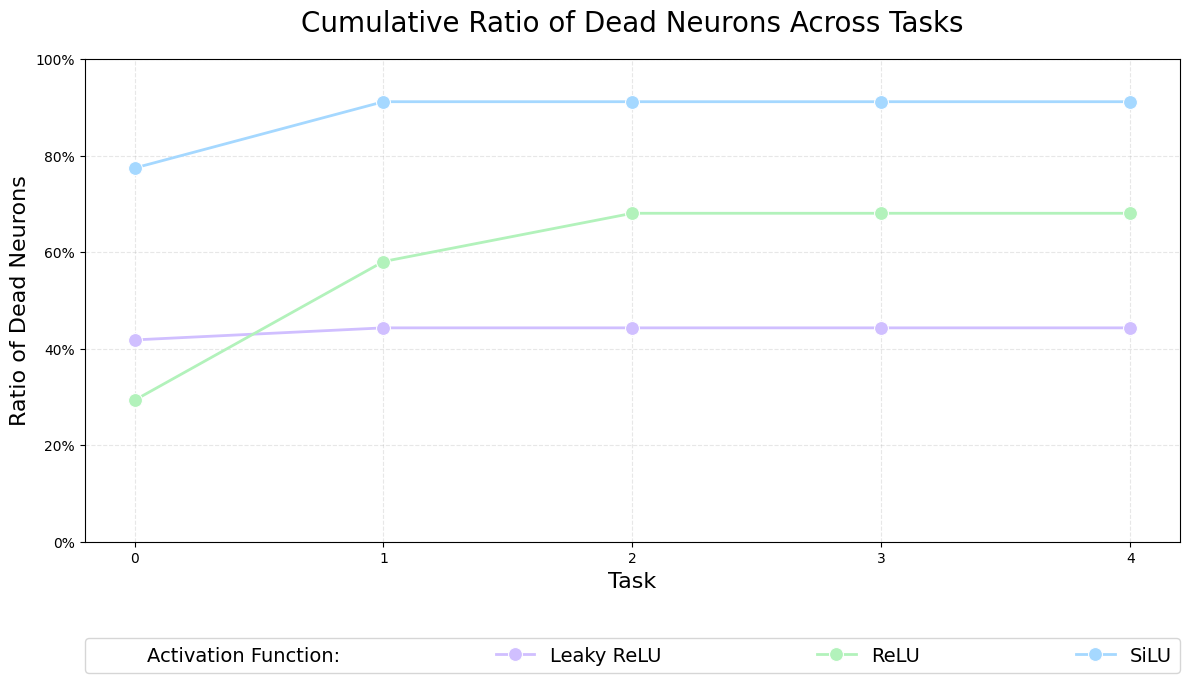

In [19]:
# Create the plot
plt.figure(figsize=(12, 8))

# Define custom colors
colors = ['#d0bfff', '#b2f2bb', '#a5d8ff']

# Create the line plot with cumulative ratios
ax = sns.lineplot(data=dead_counts_cumsum, 
            x='death_task',
            y='ratio',
            hue='activation',
            palette=colors,
            marker='o',
            markersize=10,
            linewidth=2)

# Customize the plot
plt.title('Cumulative Ratio of Dead Neurons Across Tasks', 
         fontsize=20, 
         pad=20)
plt.xlabel('Task', fontsize=16)
plt.ylabel('Ratio of Dead Neurons', fontsize=16)

# Get the current handles and labels
handles, labels = ax.get_legend_handles_labels()

# Create a new handle for the "Activation Function:" text
empty_patch = mpatches.Patch(color='none', label='Activation Function:', visible=False)

# Combine the empty patch with existing handles and labels
handles = [empty_patch] + handles
labels = ['Activation Function:'] + labels

# Format legend with all elements including the title
plt.legend(handles, labels,
          bbox_to_anchor=(0, -0.2, 1, 0),
          loc='upper center',
          ncol=4,
          mode='expand',
          borderaxespad=0.,
          fontsize=14)

# Customize grid
plt.grid(True, linestyle='--', alpha=0.3)

# Set x-axis ticks to show all tasks
plt.xticks(range(5))

# Set y-axis limits and format as percentages
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Adjust layout
plt.tight_layout(rect=[0, 0.1, 1, 1])

plt.show()

In [23]:
leaky_relu_distribution_df = pd.read_csv("leaky_relu-lr005-layer4_death_distribution.csv")
relu_distribution_df = pd.read_csv("relu-lr005-layer4_death_distribution.csv")
silu_distribution_df = pd.read_csv("silu-lr005-layer4_death_distribution.csv")

In [24]:
# Add activation function column to each dataframe
leaky_relu_distribution_df['activation'] = 'Leaky ReLU'
relu_distribution_df['activation'] = 'ReLU'
silu_distribution_df['activation'] = 'SiLU'

# Merge all dataframes
combined_distribution_df = pd.concat([
    leaky_relu_distribution_df,
    relu_distribution_df,
    silu_distribution_df
], ignore_index=True)

# Reorder columns to have activation at the beginning
cols = ['activation'] + [col for col in combined_distribution_df.columns if col != 'activation']
combined_distribution_df = combined_distribution_df[cols]

# Display first few rows to verify
display(combined_distribution_df.head())

,activation,task,epoch,death_count
0,Leaky ReLU,0,0,43
1,Leaky ReLU,0,1,12
2,Leaky ReLU,0,2,12
3,Leaky ReLU,1,0,3
4,Leaky ReLU,1,1,1


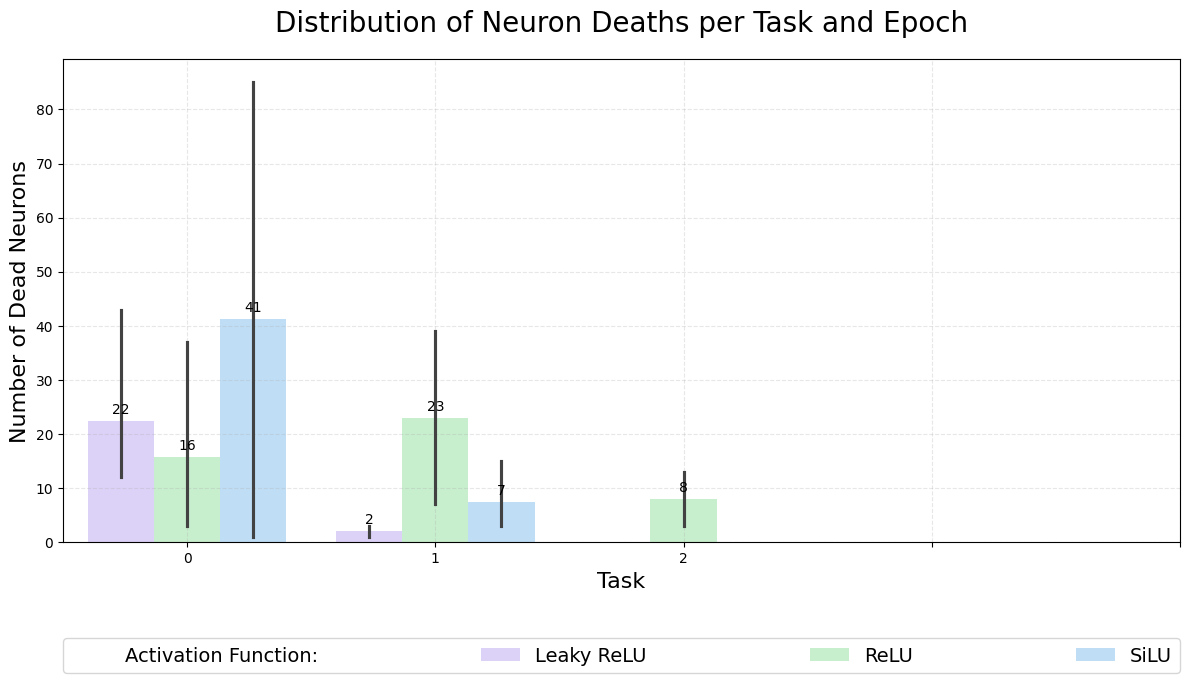

In [25]:
plt.figure(figsize=(12, 8))

# Create grouped bar plot
ax = sns.barplot(data=combined_distribution_df, 
                x='task',
                y='death_count',
                hue='activation',
                palette=['#d0bfff', '#b2f2bb', '#a5d8ff'],  # matching colors with previous plot
                alpha=0.8)

# Customize the plot
plt.title('Distribution of Neuron Deaths per Task and Epoch', 
         fontsize=20, 
         pad=20)
plt.xlabel('Task', fontsize=16)
plt.ylabel('Number of Dead Neurons', fontsize=16)

# Get the current handles and labels
handles, labels = ax.get_legend_handles_labels()

# Create a new handle for the "Activation Function:" text
empty_patch = mpatches.Patch(color='none', label='Activation Function:', visible=False)

# Combine the empty patch with existing handles and labels
handles = [empty_patch] + handles
labels = ['Activation Function:'] + labels

# Format legend with all elements including the title
plt.legend(handles, labels,
          bbox_to_anchor=(0, -0.2, 1, 0),
          loc='upper center',
          ncol=4,
          mode='expand',
          borderaxespad=0.,
          fontsize=14)

# Customize grid
plt.grid(True, linestyle='--', alpha=0.3)

# Set x-axis ticks to show all tasks
plt.xticks(range(5))

# Add value labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

# Adjust layout
plt.tight_layout(rect=[0, 0.1, 1, 1])

plt.show()

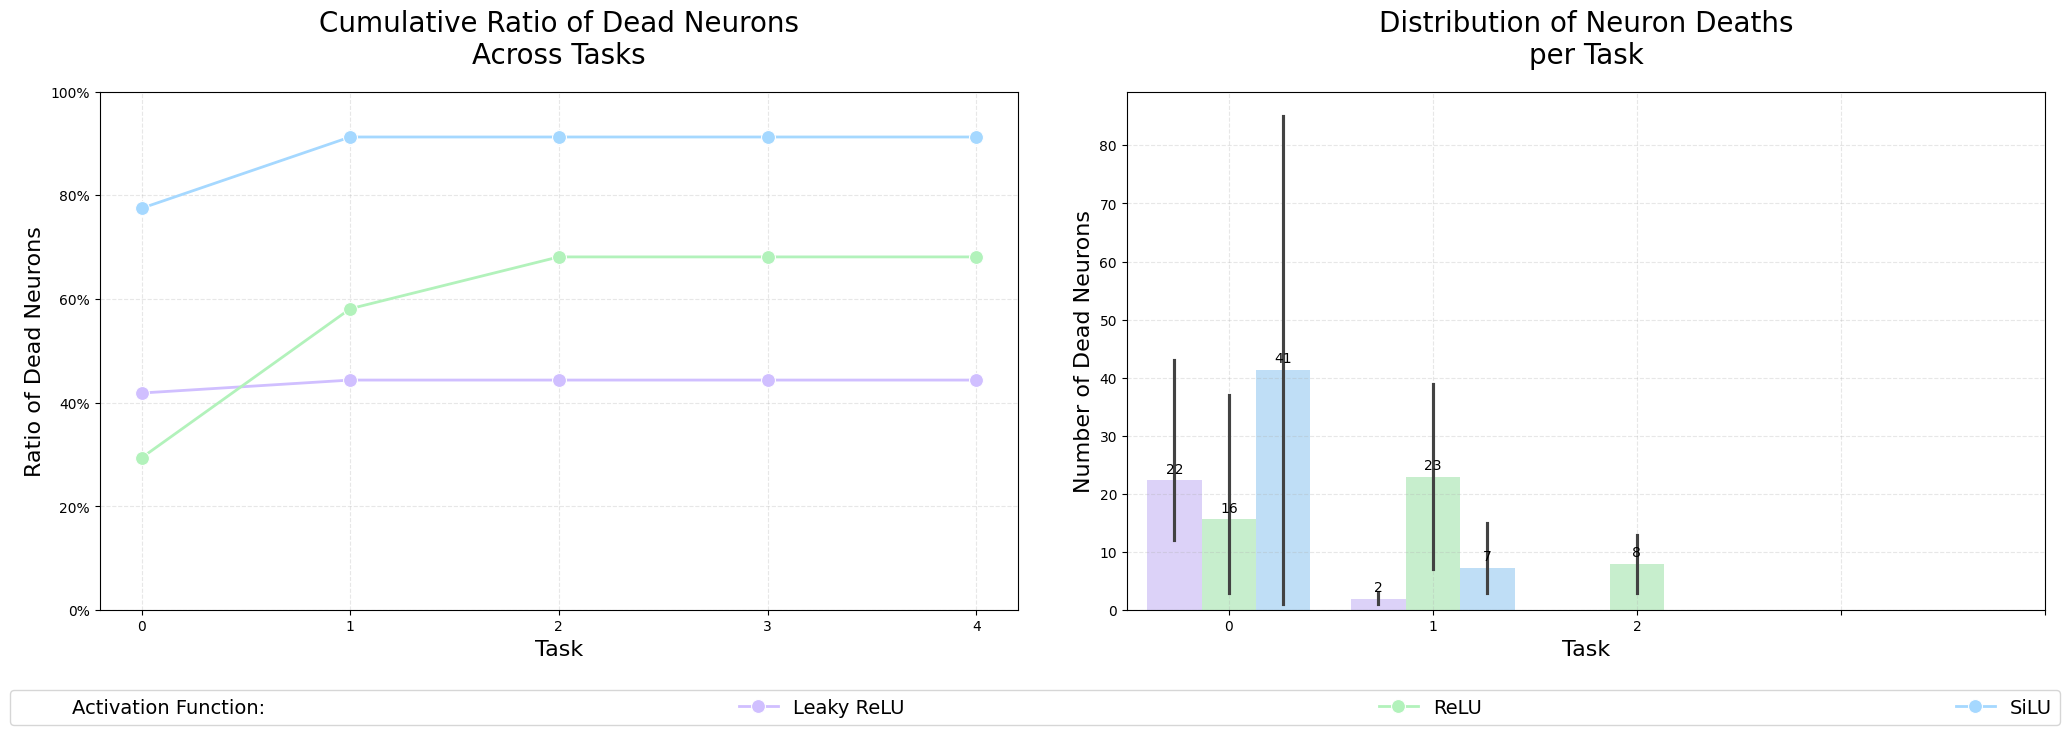

In [53]:
# Create a figure with two subplots side by side with specific spacing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20.5, 8))  # Slightly wider figure to accommodate gap

# Adjust the position of the second subplot to create gap
ax2.set_position([ax2.get_position().x0 + -0.02, 
                 ax2.get_position().y0,
                 ax2.get_position().width, 
                 ax2.get_position().height])

# Define custom colors
colors = ['#d0bfff', '#b2f2bb', '#a5d8ff']

# First subplot - Cumulative ratio plot
sns.lineplot(data=dead_counts_cumsum, 
            x='death_task',
            y='ratio',
            hue='activation',
            palette=colors,
            marker='o',
            markersize=10,
            linewidth=2,
            ax=ax1)

# Customize first subplot
ax1.set_title('Cumulative Ratio of Dead Neurons\nAcross Tasks', 
             fontsize=20, 
             pad=20)
ax1.set_xlabel('Task', fontsize=16)
ax1.set_ylabel('Ratio of Dead Neurons', fontsize=16)
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.set_xticks(range(5))
ax1.set_ylim(0, 1)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Second subplot - Distribution plot
sns.barplot(data=combined_distribution_df, 
           x='task',
           y='death_count',
           hue='activation',
           palette=colors,
           alpha=0.8,
           ax=ax2)

# Customize second subplot
ax2.set_title('Distribution of Neuron Deaths\nper Task', 
             fontsize=20, 
             pad=20)
ax2.set_xlabel('Task', fontsize=16)
ax2.set_ylabel('Number of Dead Neurons', fontsize=16)
ax2.grid(True, linestyle='--', alpha=0.3)
ax2.set_xticks(range(5))

# Add value labels on the bars
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.0f', padding=3)

# Remove individual legends
ax1.get_legend().remove()
ax2.get_legend().remove()

# Get handles and labels from any of the plots (using ax1 here)
handles, labels = ax1.get_legend_handles_labels()

# Create a new handle for the "Activation Function:" text
empty_patch = mpatches.Patch(color='none', label='Activation Function:', visible=False)

# Combine the empty patch with existing handles and labels
handles = [empty_patch] + handles
labels = ['Activation Function:'] + labels

# Add a single legend at the bottom
fig.legend(handles, labels,
          bbox_to_anchor=(0, 0.08, 1, 0),
          loc='upper center',
          ncol=4,
          mode='expand',
          borderaxespad=0.,
          fontsize=14)

# Adjust layout
plt.tight_layout(rect=[0, 0.1, 1, 0.95])

plt.show()